## Проект: вариант 1
Проект: вариант 1
Представьте, что вы работаете в компании, которая разрабатывает мобильные игры. К вам пришел менеджер с рядом задач по исследованию нескольких аспектов мобильного приложения:

1. В первую очередь, его интересует показатель retention. Напишите функцию для его подсчета.
2. Помимо этого, в компании провели A/B тестирование наборов акционных предложений. На основе имеющихся данных определите, какой набор можно считать лучшим и на основе каких метрик стоит принять правильное решение.
3. Предложите метрики для оценки результатов последнего прошедшего тематического события в игре.

Разработчик Богатырев К.И.

Поток: 27.02.2023

## Задание 1

Retention – один из самых важных показателей в компании. Ваша задача – написать функцию, которая будет считать retention игроков (по дням от даты регистрации игрока). Данные лежат в папке shared и имеют следующую структуру:

shared/problem1-reg_data.csv – данные о времени регистрации

|reg_ts|uid|
|-|-|
|906166566|2|
|906344325|2|
|906686169|2|
|906893386|2|
|906980227|2|

shared/problem1-auth_data.csv – данные о времени захода пользователей в игру

|auth_ts|uid|
|-|-|
|906166566|2|
|924422172|3|
|937374732|4|
|947425117|5|
|955630339|6|

Функция должна быть написана на python. В ходе решения можно тестировать работу функции как на полном датасете, так и на части (сэмпле) данных.

## Основная идея выполнения задачи

1. Выгрузка и исследование данных
2. Формирование общего df
3. Отображение функции
4. Тестирование результатов

### 1. Выгрузка и исследование данных

1. Загрузим библиотеки, которые будут использованы в выполнении задания

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as ss

%matplotlib inline

2. Выгрузим данные с информацией о времени регистрации и времени захода пользователей в игру

In [2]:
#Выгрузим данные о времени регистрации
df_reg = pd.read_csv('/mnt/HC_Volume_18315164/home-jupyter/jupyter-k-bogatyrev-38/shared/problem1-reg_data.csv', sep=';')
#Выгрузим данные о времени захода пользователя в игру
df_auth = pd.read_csv('/mnt/HC_Volume_18315164/home-jupyter/jupyter-k-bogatyrev-38/shared/problem1-auth_data.csv', sep=';')

3. Исследуем данные на общие параметры: количество строк и столбцов, типы данных и т.д.

In [3]:
#Проверим количество строк и столбцов в массиве о времени регистрации пользователей
df_reg.shape

(1000000, 2)

In [4]:
#Проверим количество строк и столбцов в массиве о времени захода пользователей в игру
df_auth.shape

(9601013, 2)

In [5]:
#Выгрузим первые 5 строк массива о времени пользователей
df_reg.head()

,reg_ts,uid
0,911382223,1
1,932683089,2
2,947802447,3
3,959523541,4
4,969103313,5


In [6]:
#Выгрузим первые 5 строк массива о времени захода пользователей в игру
df_auth.head()

,auth_ts,uid
0,911382223,1
1,932683089,2
2,932921206,2
3,933393015,2
4,933875379,2


Видим, что данные изображены в секундах с 01-01-1970. Это наталкивает на мысль, что в дальнейшем необходимо провести изменения формата типа данных о дате

In [7]:
#Проверим имеются ли пропущенные значения в данных о времени регистрации
df_reg.isna().sum()

reg_ts    0
uid       0
dtype: int64

Пропущенные значения отсутствуют

In [8]:
#Проверим имеются ли пропущенные значения в данных о времени захода пользователей в игру
df_auth.isna().sum()

auth_ts    0
uid        0
dtype: int64

Пропущенные значения отсутствуют

In [9]:
#Проверим типы данных массива о времени регистрации
df_reg.dtypes

reg_ts    int64
uid       int64
dtype: object

In [10]:
#Проверим типы данных массива о времени захода пользователей в игру
df_auth.dtypes

auth_ts    int64
uid        int64
dtype: object

4. Далее необходимо привести данные к верному типу для дальнейшего выполнения задания

In [11]:
#Преобразуем столбец с датой массива о времени регистрации
df_reg.reg_ts = pd.to_datetime(df_reg.reg_ts, unit='s').dt.date
#Преобразуем столбец с датой массива о времени захода пользователей в игру
df_auth.auth_ts = pd.to_datetime(df_auth.auth_ts, unit='s').dt.date

In [12]:
#Выгрузим данные для проверки
df_reg.head()

,reg_ts,uid
0,1998-11-18,1
1,1999-07-22,2
2,2000-01-13,3
3,2000-05-28,4
4,2000-09-16,5


In [13]:
df_auth.head()

,auth_ts,uid
0,1998-11-18,1
1,1999-07-22,2
2,1999-07-25,2
3,1999-07-31,2
4,1999-08-05,2


Оба массива преобразованы и готовы к слиянию!

### 2. Формирование общего df

По исследованию данных, проведенному ранее, мы поняли, что массив данных о времени захода пользователей в игру больше чем массив данных о времени захода пользователя в игру. Соответственно слияние пользователей должно проходить  с помощью left join меньшей таблицы к большей.

In [14]:
#Смерджим 2 таблицы в единый датафрейм
df_merge = df_reg.merge(df_auth, on='uid', how='left')

In [15]:
#Отобразим данные для проверки
df_merge.head(20)

,reg_ts,uid,auth_ts
0,1998-11-18,1,1998-11-18
1,1999-07-22,2,1999-07-22
2,1999-07-22,2,1999-07-25
3,1999-07-22,2,1999-07-31
4,1999-07-22,2,1999-08-05
5,1999-07-22,2,1999-08-11
6,1999-07-22,2,1999-08-14
7,1999-07-22,2,1999-08-18
8,1999-07-22,2,1999-08-20
9,1999-07-22,2,1999-08-26


### 3. Отображение функции

Расчет retention будет производиться в виде когортного анализа. Пользователи будут разделяться на когорты по дате регистрации. Также в задаче указано то, что тестирование может выполняться как на всем массиве данных, так и его сегментах. Соответственно в функции должен фугирурировать диапозон когорт.

In [16]:
def retention(df, start_period, end_period, period_count):
    #Выведем массив с периодами, который в дальнейшем будет являться списком колонок
    massiv_period_count = []
    for i in range(1, period_count + 1):
        massiv_period_count.append(i)
    #Переведем формат начального периода в дату для совпадения с индексами
    start_period = pd.to_datetime(start_period).date()
    #Переведем формат конечного периода в дату для совпадения с индексами
    end_period = pd.to_datetime(end_period).date()
    #Сделаем так, чтобы мы могли выбрать любой диапозон дат регистрации (когорт)
    start_period = df.reg_ts.loc[df.reg_ts >= start_period].min()
    end_period = df.reg_ts.loc[df.reg_ts <= end_period].max()
    
    #Написание алгоритма выполнения задачи
    #Вычислим разность в днях между датой активности и датой регистрации
    df['diff_days'] = (df.auth_ts - df.reg_ts).dt.days + 1
    #Переименуем колонки для удобства пользователя
    df_changed = df.rename(columns={'reg_ts':'cohort', 'diff_days':'period'})
    #Сгруппируем данные по когорте и периоду и посчитаем количество уникальных значений пользователей для каждой группы
    df_changed = df_changed.groupby(['cohort', 'period'], as_index=False).agg({'uid':'nunique'})
    #Преобразуем таблицу в другой вид
    df_changed = df_changed.pivot(index='cohort', columns='period', values='uid')[start_period:end_period]
    #Так как значения могут иметь тип NaN, то преобразуем данные значения в 0
    df_changed = df_changed.fillna(0)
    #Выделим значения, по которым будет высчитываться retention
    full_count = df_changed[1]
    #Разделим полученные значения на общие с округлением до трех знаков и представим значения в виде процентов
    df_changed = df_changed.divide(full_count, axis=0).round(3)
    
    fig, ax = plt.subplots(figsize=(20, 18))
    graph = sns.heatmap(data=df_changed[massiv_period_count], annot=True, fmt='.1%', ax=ax, cmap='crest')
    graph.set(xlabel='', ylabel='')
    graph.xaxis.tick_top()
    
    #Выведем графическое отображение таблицы
    return df_changed[massiv_period_count]

### 4. Тестирование результатов

Для того, чтобы протестировать результаты необходимо знать о назначении переменных:
1. df - обозначает предобратанный ранее массив данных, с которым мы работаем
2. start_period (формат данных 'год-месяц-день') - обозначает самую раннюю дату регистрации (когорту)
3. end_period (формат данных 'год-месяц-день') - обозначает самую позднюю дату регистрации (когорту)
4. period_count - обозначает число дней, за который мы хотим узнать retention

Иными словами с помощью переменных start_period и end_period создается диапозон дат регистрации (когорт), а с помощью period_count мы задаем диапозон времени, в котором нас интересует retention

#### Примеры теста

Посмотрим как вели себя пользователи, которые были зарегестрированы в период с 24 мая 2019 по 15 июля 2019 на протяжении 2 недель своей активности

period,1,2,3,4,5,6,7,8,9,10,11,12,13,14
cohort,,,,,,,,,,,,,,
2019-05-24,1.0,0.018,0.045,0.041,0.049,0.057,0.071,0.056,0.047,0.043,0.057,0.056,0.054,0.042
2019-05-25,1.0,0.022,0.056,0.046,0.050,0.066,0.072,0.070,0.058,0.047,0.062,0.053,0.049,0.060
2019-05-26,1.0,0.022,0.031,0.038,0.053,0.053,0.064,0.054,0.041,0.057,0.041,0.051,0.049,0.046
2019-05-27,1.0,0.020,0.049,0.059,0.039,0.058,0.061,0.066,0.059,0.041,0.053,0.054,0.050,0.041
2019-05-28,1.0,0.009,0.049,0.024,0.044,0.049,0.062,0.046,0.038,0.039,0.039,0.049,0.049,0.046
2019-05-29,1.0,0.024,0.042,0.058,0.047,0.048,0.074,0.065,0.058,0.047,0.047,0.059,0.061,0.057
2019-05-30,1.0,0.024,0.042,0.058,0.047,0.058,0.073,0.055,0.054,0.050,0.047,0.052,0.056,0.054
2019-05-31,1.0,0.019,0.040,0.052,0.052,0.058,0.071,0.062,0.039,0.047,0.056,0.043,0.056,0.050
2019-06-01,1.0,0.013,0.044,0.050,0.050,0.054,0.084,0.055,0.042,0.050,0.043,0.062,0.051,0.040


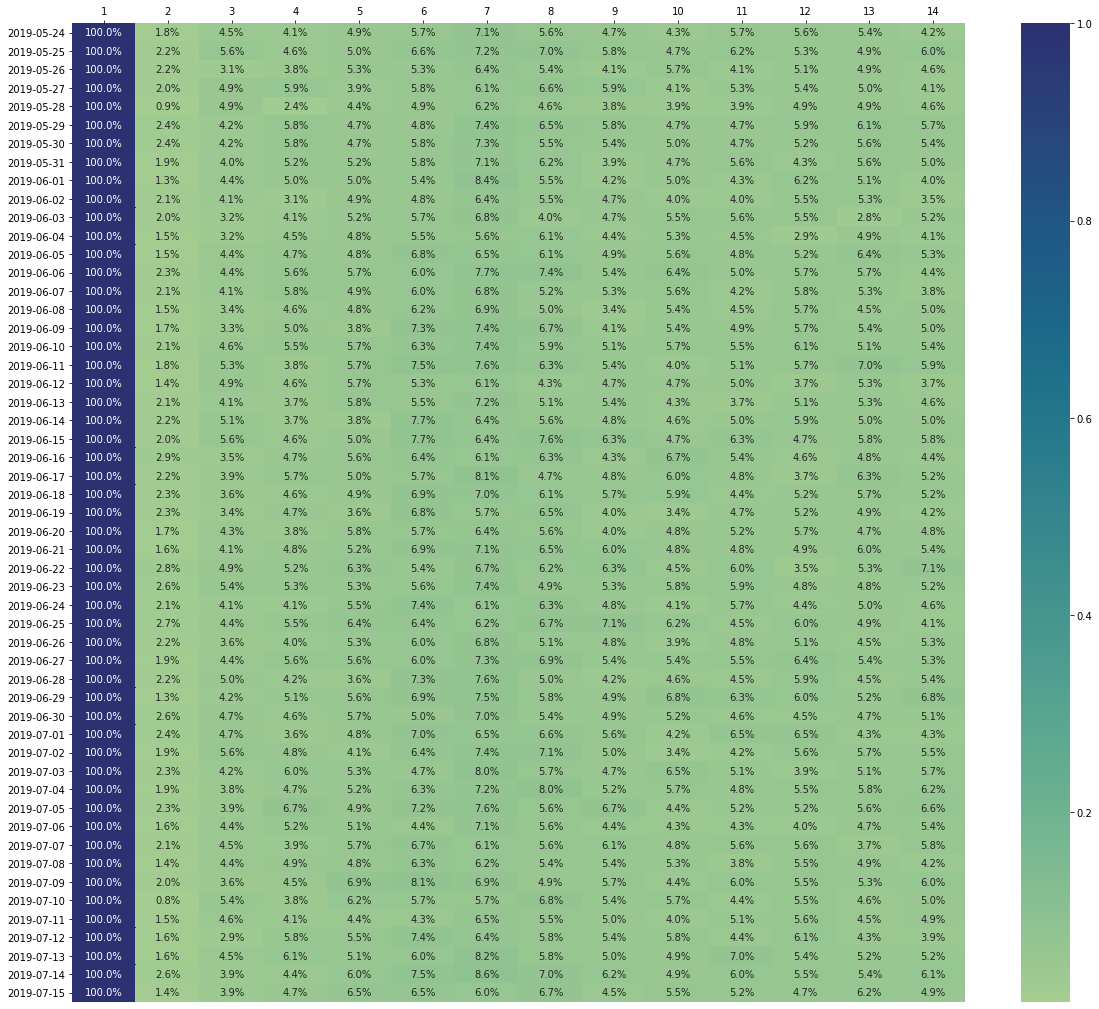

In [17]:
retention(df_merge, '2019-05-24', '2019-07-15', 14)

Посмотрим как вели себя пользователи, которые были зарегестрированы в период с 5 февраля 2005 по 16 июня 2006 на протяжении 3 недель своей активности

period,1,2,3,4,5,6,7,8,9,10,...,12,13,14,15,16,17,18,19,20,21
cohort,,,,,,,,,,,,,,,,,,,,,
2005-02-07,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2005-02-14,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2005-02-21,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2005-02-28,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2005-03-07,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2006-06-02,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2006-06-05,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2006-06-09,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


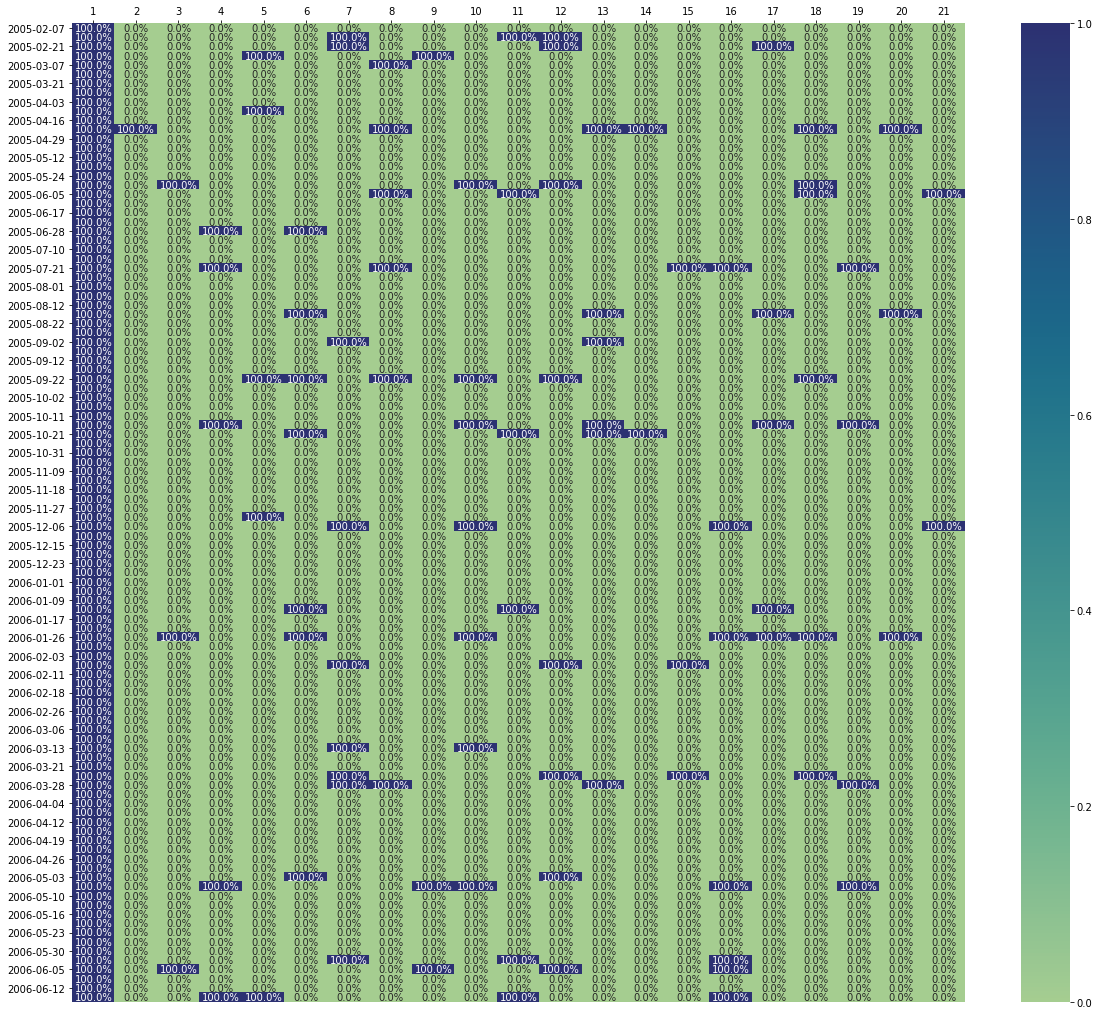

In [18]:
retention(df_merge, '2005-02-05', '2006-06-16', 21)

## Задание 2

Имеются результаты A/B теста, в котором двум группам пользователей предлагались различные наборы акционных предложений. Известно, что ARPU в тестовой группе выше на 5%, чем в контрольной. При этом в контрольной группе 1928 игроков из 202103 оказались платящими, а в тестовой – 1805 из 202667.

Какой набор предложений можно считать лучшим? Какие метрики стоит проанализировать для принятия правильного решения и как?

Формат данных:

|user_id|revenue|testgroup|
|-|-|-|
|1|0|b|
|2|0|a|
|3|0|a|
|4|0|b|
|5|0|b|

## Основная идея выполнения задачи

1. Выгрузить и исследовать данные
2. По имеющимся исходным данным определить какая из групп является тестовой, а какая контрольной
3. Выбор метрик, по которым будем проводить статистический анализ
4. Выполнение статичтического анализа и выявления результатов
5. На основе результатов статистического анализа сделать выводы

### 1. Выгрузить и исследовать данные

In [19]:
#Выгрузим данные
df = pd.read_csv('/mnt/HC_Volume_18315164/home-jupyter/jupyter-k-bogatyrev-38/Lessons/Проект_1_Задание_2.csv', sep=';')

In [20]:
#Посмотрим основную информацию о массиве данных
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404770 entries, 0 to 404769
Data columns (total 3 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   user_id    404770 non-null  int64 
 1   revenue    404770 non-null  int64 
 2   testgroup  404770 non-null  object
dtypes: int64(2), object(1)
memory usage: 9.3+ MB


Посмотрим есть ли пропущенные значения значения в таблице

In [21]:
#Проверка на наличие пропусков
df.isna().sum()

user_id      0
revenue      0
testgroup    0
dtype: int64

Пропусков не обнаружено

Проверим количество уникальных пользователей в таблице

In [22]:
df.user_id.nunique()

404770

Так как количество уникальных пользователей равно количеству строк в таблице, значит каждый пользователь в массиве данных является уникальным

### 2. По имеющимся исходным данным определить какая из групп является тестовой, а какая контрольной

По исходным данным в контрольной группе находятся 202103 пользователя, а в тестовой 202667.
Определим какой из них является группа а и группа b

In [23]:
df.groupby('testgroup', as_index=False).agg({'user_id':'nunique'})

,testgroup,user_id
0,a,202103
1,b,202667


По полученному результату можем сделать вывод, что группа а является контрольной, а группа b является тестовой.
Для дальнейшего удобства пользования данными переименуем группы.

In [24]:
df.testgroup = df.testgroup.map({'a':'control', 'b':'test'})

### 3. Выбор метрик, по которым будем проводить статистический анализ

В имеющихся данных присутствует ключевой столбец revenue, т.е. выручка. Так как есть нулевые и ненулевые значения данного столбца мы можем сделать вывод, что часть пользователь является платящими, а другая часть - неплатящими. 

Первой метрикой в голову приход конверсия - показатель того, какая часть пользователь перешла в разряд клиентов.

Второй метрикой можно считать ARPU - средний доход с привлеченного пользователя.

Третьей метрикой можно считать ARPPU - средний доход с платящего пользователя (клиента).

### 4. Выполнение статичтического анализа и выявления результатов

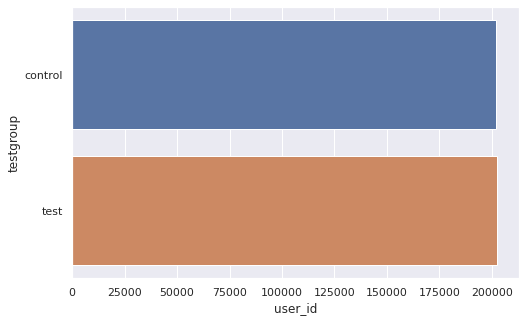

In [25]:
#Визуализируем как распределяеются выборки по контрольной и тестовой группе
sns.set(rc={'figure.figsize':(8,5)})
sns.barplot(data=df.groupby('testgroup', as_index=False).agg({'user_id':'nunique'}), y='testgroup', x='user_id')

Видим, что выборки имеют приблизительно одинаковую размерность

#### Конверсия

Сформируем нулевую гипотезу. Н0 - показатель конверсии не зависит от того какой группе принадлежат пользователи

Расчитаем конверсию по группам

In [26]:
conversion = df.groupby('testgroup', as_index=False).agg({'revenue':lambda x: (x[x > 0].count() / x.count() * 100).round(3)})

In [27]:
conversion

,testgroup,revenue
0,control,0.954
1,test,0.891


Для применения критерия Хи - квадрат необходимо ввести новый параметр - категория пользователя. Пользователи разделяются на 2 категории - платящие или неплатящие

In [28]:
df['category'] = df.apply(lambda x: 'paying' if x['revenue'] > 0 else 'not_paying', axis=1)

In [29]:
df.head()

,user_id,revenue,testgroup,category
0,1,0,test,not_paying
1,2,0,control,not_paying
2,3,0,control,not_paying
3,4,0,test,not_paying
4,5,0,test,not_paying


Создадим таблицу сопряженнсти для применения критерия Хи - квадрат

In [30]:
df_crosstab = pd.crosstab(df.testgroup, df.category)

In [31]:
df_crosstab

category,not_paying,paying
testgroup,,
control,200175,1928
test,200862,1805


Применим критерий Хи квадрат для выявления стат значимых различий

In [32]:
p_value = ss.chi2_contingency(df_crosstab)[1]
if p_value > 0.05:
    print('p-value = {}. Статистически значимых различий не было обнаружено'.format(p_value.round(4)))
else:
    print('p-value = {}. Наблюдаются статистически значимые различия'.format(p_value.round(4)))

p-value = 0.0365. Наблюдаются статистически значимые различия


По данному исследованию можно сделать вывод, что нулевую гипотезу о независимости показателя конверсии от группы, в которой находятся пользователи можно отклонить

#### ARPU

ARPU - Cредний доход с привлечённого пользователя. Для оценки среднего нам отлично подойдет 2 метода: 1) t-тест 2) bootstrap.


#### t-тест

Сформируем нулевую гипотезу. Н0 - показатели ARPU у контрольной и тестовой группы равны

1) Разобьем имеющиеся данные на контрольную и тестовую выборки показателя revenue

In [33]:
control = df.query("testgroup == 'control'")['revenue']
test = df.query("testgroup == 'test'")['revenue']

2) Проверим распределения выборок

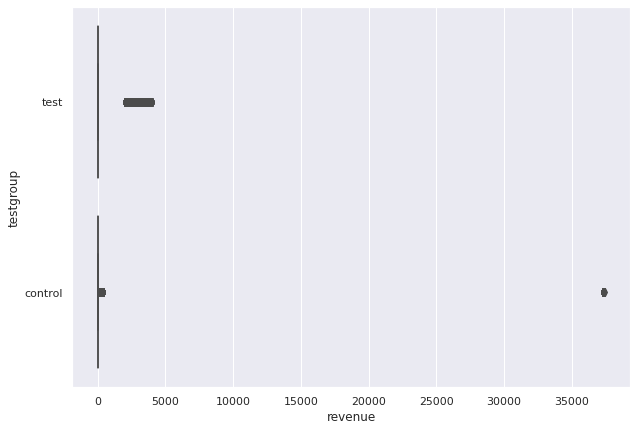

In [34]:
sns.set(rc={'figure.figsize':(10,7)})
sns.boxplot(data=df, x='revenue', y='testgroup')

Видим, что распределения являются крайне различными по своей структуре. У тестовой группы мы не наблюдаем выбросов и все значения лежат приблизительно в одной области. У контрольной группы наоборот имеются большие выбросы, а основная часть приближена к 0.

Чтобы перейти к выполнению t-теста нужно удостовериться в выполнении условий нормальности и гомогенности дисперсий

/opt/tljh/user/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


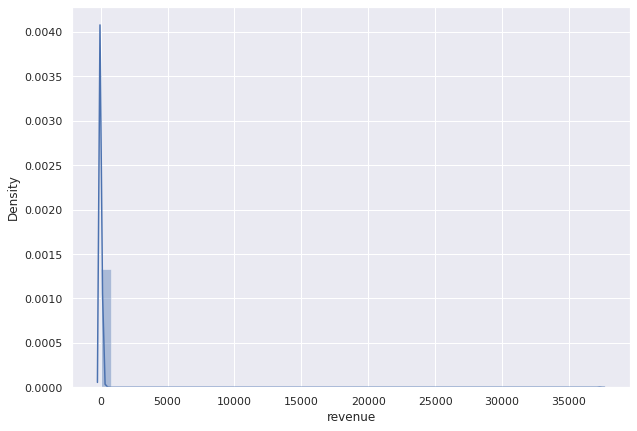

In [35]:
#Посмотрим на распределение значений revenue в контрольной группе
sns.set(rc={'figure.figsize':(10,7)})
sns.distplot(control)

/opt/tljh/user/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


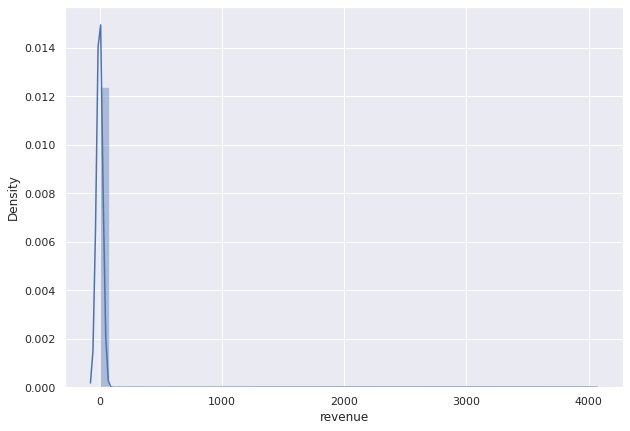

In [36]:
#Посмотрим на распределение значений revenue в тестовой группе
sns.set(rc={'figure.figsize':(10,7)})
sns.distplot(test)

Проверим распределения на нормальность 

In [37]:
#Проведем normaltest с контрольной группой
p_value = ss.normaltest(control)[1]
if p_value > 0.05:
    print('p-value = {}. Распределение можно считать нормальным.'.format(p_value))
else:
    print('p-value = {}. Распределение статистически значимо отличается от нормального.'.format(p_value))

p-value = 0.0. Распределение статистически значимо отличается от нормального.


In [38]:
#Проведем normaltest с тестовой группой
p_value = ss.normaltest(test)[1]
if p_value > 0.05:
    print('p-value = {}. Распределение можно считать нормальным.'.format(p_value))
else:
    print('p-value = {}. Распределение статистически значимо отличается от нормального'.format(p_value))

p-value = 0.0. Распределение статистически значимо отличается от нормального


Оба распределения не выполняют требование нормальности, но так как выборки имеют достаточно большой объем (у контрольной 202103, а у тестовой 202667) требованием нормальности можно пренебречь.

Проверим выборки на требование гомогенности дисперсий с помощью критерия Левена

In [39]:
#Выполним тест Левена
p_value = ss.levene(control, test)[1]
if p_value > 0.05:
    print('p-value = {}. Распределения выполняют требование гомогенности дисперсий.'.format(p_value))
else:
    print('p-value = {}. Распределения не выполняют требование гомогенности дисперсий.'.format(p_value))

p-value = 0.5324948591043842. Распределения выполняют требование гомогенности дисперсий.


Требование гомогенности дисперсий выполняется. Приступим к выполнению t - теста!

In [40]:
p_value = ss.ttest_ind(control, test)[1]
if p_value > 0.05:
    print('p-value = {}. Статистически значимые значения не обнаружены. Не можем отклонить нулевую гипотезу'.format(p_value))
else:
    print('p-value = {}. Статистически значимые значения обнаружены. Можем отклонить нулевую гипотезу.'.format(p_value))

p-value = 0.532494858971837. Статистически значимые значения не обнаружены. Не можем отклонить нулевую гипотезу


Статистически значимых различий не обнаружено

#### Bootstrap

При помощи bootstrap определим доверительный интервал средних разности между значениями выборок контрольной и тестовых групп. Если доверительный интервал будет включать в себя 0, то в таком случае статистически значимых различий обнаружено не будет. В обратном случае можно сделать противоположный вывод.

In [41]:
def bootstrap(test_sample, control_sample):
    
    #Соберем средние по выборкам для bootstrap у тестовой группы
    means_sample = []
    bootstrap_length = max([len(test_sample), len(control_sample)])
    for i in range(1000):
        sample_data_test = test_sample.sample(bootstrap_length, replace=True).values
        sample_data_control = control_sample.sample(bootstrap_length, replace=True).values
        means_sample.append(np.mean(sample_data_test - sample_data_control))
    means_sample = pd.Series(means_sample)
    means_sample_max = means_sample.quantile(0.975).round(3)
    means_sample_min = means_sample.quantile(0.025).round(3)

    
    return print('Доверительный интервал разности средних ({}, {})'.format(means_sample_min, means_sample_max))

In [42]:
bootstrap(test, control)

Доверительный интервал разности средних (-3.126, 5.482)


Доверительный интервал включает в себя 0, значит статистически значимых различий не обнаружено.

#### ARPPU

ARPPU - Средний доход на платящего пользователя (то есть клиента). Для оценки среднего нам отлично подойдет 2 метода: 1) t-тест 2) bootstrap.

#### t-тест

Сформируем нулевую гипотезу. Н0 - показатели ARPPU у контрольной и тестовой группы равны

1) Разобьем имеющиеся данные на контрольную и тестовую выборки показателя revenue

In [43]:
control = df.query("testgroup == 'control' and revenue > 0")['revenue']
test = df.query("testgroup == 'test' and revenue > 0")['revenue']

/opt/tljh/user/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


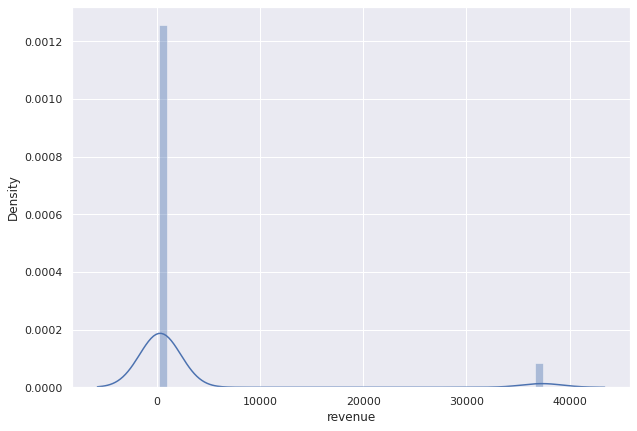

In [44]:
#Посмотрим на распределение значений revenue в контрольной группе
sns.set(rc={'figure.figsize':(10,7)})
sns.distplot(control)

/opt/tljh/user/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


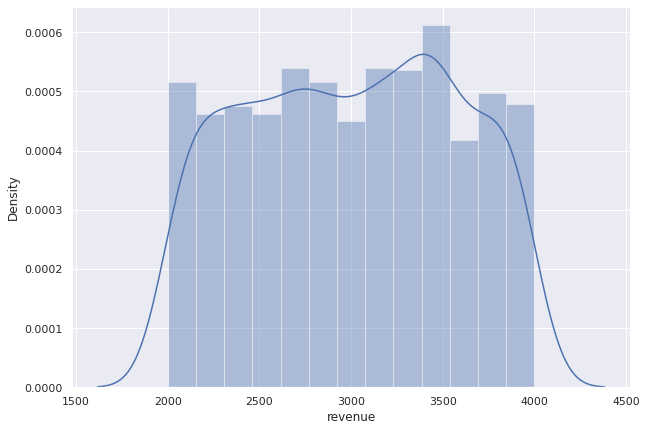

In [45]:
#Посмотрим на распределение значений revenue в тестовой группе
sns.set(rc={'figure.figsize':(10,7)})
sns.distplot(test)

In [46]:
#Проведем normaltest с контрольной группой
p_value = ss.normaltest(control)[1]
if p_value > 0.05:
    print('p-value = {}. Распределение можно считать нормальным.'.format(p_value))
else:
    print('p-value = {}. Распределение статистически значимо отличается от нормального.'.format(p_value))

p-value = 1.2341605505935488e-303. Распределение статистически значимо отличается от нормального.


In [47]:
#Проведем normaltest с тестовой группой
p_value = ss.normaltest(test)[1]
if p_value > 0.05:
    print('p-value = {}. Распределение можно считать нормальным.'.format(p_value))
else:
    print('p-value = {}. Распределение статистически значимо отличается от нормального'.format(p_value))

p-value = 7.943249488371762e-233. Распределение статистически значимо отличается от нормального


Проверим объемы выборок для того, чтобы удостовериться, что можно пренебречь требованием нормальности

In [48]:
#Объем выборки контрольной группы
control.shape[0]

1928

In [49]:
#Объем выборки тестовой группы
test.shape[0]

1805

Оба распределения не выполняют требование нормальности, но так как выборки имеют достаточно большой объем (у контрольной 1928, а у тестовой 1805), значит можем пренебречь требованием нормальности.

In [50]:
#Выполним тест Левена
p_value = ss.levene(control, test)[1]
if p_value > 0.05:
    print('p-value = {}. Распределения выполняют требование гомогенности дисперсий.'.format(p_value))
else:
    print('p-value = {}. Распределения не выполняют требование гомогенности дисперсий.'.format(p_value))

p-value = 3.779689868667878e-19. Распределения не выполняют требование гомогенности дисперсий.


Требование гомогенности дисперсий не выполняется. Однако можем ввести поправку Уэлча, которая применяется в случае невыполнения требования гомогенности дисперсий. Приступим к выполнению t - теста!

In [51]:
p_value = ss.ttest_ind(control, test, equal_var=False)[1]
if p_value > 0.05:
    print('p-value = {}. Статистически значимые значения не обнаружены. Не можем отклонить нулевую гипотезу'.format(p_value))
else:
    print('p-value = {}. Статистически значимые значения обнаружены. Можем отклонить нулевую гипотезу.'.format(p_value))

p-value = 0.10020780398916015. Статистически значимые значения не обнаружены. Не можем отклонить нулевую гипотезу


#### Bootstrap

Применим функцию bootstrap, написанную ранее для имеющихся данных

In [ ]:
bootstrap(test, control)

Доверительный интервал включает в себя 0, значит статистически значимых различий не обнаружено.

### 5. На основе результатов статистического анализа сделать выводы

На основе проведенного эксперимента не стоит делать каких-то однозначных выводов. Статистически значимые различия наблюдаются только у показателя конверсии (у контрольной группы он больше, чем у тестовой). Однако, несмотря на то, что показатели ARPU и ARPPU не показали статистически значимых различий, по распределению данных параметров было видно, что у контрольной группы параметр revenue имеют намного более широкий диапозон, чем у тестовой группы. В тестовой группе покупательная способность намного более конкретная и несмотря на то, что клиентов в тестовой группе оказалось меньше нижняя граница доверительного интервала и у ARPU и у ARPPU оказалась выше, чем у контрольной. По имеющимся данным ARPU у тестовой группы оказался выше, чем у контрольной группы на 5%.
    
По моему мнению стоит все-таки конкретизировать задачу и добавить данные, например о дате и времени транзакций, чтобы понять являются ли транзакции у контрольной группы сезонными или о том является ли покупка оптовой или розничной для конкретизации акционных предложений.
    
В общем и целом мой вывод следующий: стоит оставить акционные предложения тестовой группы пользователей, так как уровень выручки выровнялся у пользователей при том, что ARPU вырос на 5%.

## Задание 3

В игре Plants & Gardens каждый месяц проводятся тематические события, ограниченные по времени. В них игроки могут получить уникальные предметы для сада и персонажей, дополнительные монеты или бонусы. Для получения награды требуется пройти ряд уровней за определенное время. С помощью каких метрик можно оценить результаты последнего прошедшего события?

Предположим, в другом событии мы усложнили механику событий так, что при каждой неудачной попытке выполнения уровня игрок будет откатываться на несколько уровней назад. Изменится ли набор метрик оценки результата? Если да, то как?

## Предполагаемые метрики

Основным показателем выбора метрик являются отсутствие информации о любой доходности или монетизации и наличие информации об ограничении во времени. На основании этого и будет происходить выбор метрик.

#### Стандартное тематическое событие

1. Средняя дневная аудитория – для того, чтобы определить падает или растет активность пользователей во время проведения тематического события.

2. Время, проведенное в игре – для того, чтобы определить насколько пользователи заинтересованы тематическим событием относительно обычного дня.

3. Конверсия – для того, чтобы понять, как наше тематическое событие влияет на привлечение новых пользователей.

4. Средний временной диапазон между игровыми сессиями – для того, чтобы определить, как введение новых игровых уровней влияет на удержание пользователей относительно обычного дня.

#### Усложненное тематическое событие

В данном случае присутствует фактор неудачи у пользователей. Все мы не любим проигрывать, но в некоторых случаях фактор поражения вызывает большее количество азарта, чем в отсутствие данного фактора.

В дополнение к приведенным выше метрикам я бы добавил следующие:

1. Количество отвалившихся пользователей после первого отката – позволит оценить азарт пользователей. В целом этот показатель позволит понять стоит ли вообще вводить эту механику.

2. Среднее количество откатов – позволит понять насколько уровни являются сложными и стоит ли их упростить для большего получения бонусов пользователями.
